In [5]:
import os
import h5py

def check_hdf5_files(directory):
    """
    Recursively checks all HDF5 files in the given directory and its subdirectories.
    Prints the names of any corrupted files.
    """
    corrupted_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".h5") or file.endswith(".hdf5"):
                file_path = os.path.join(root, file)
                try:
                    with h5py.File(file_path, 'r') as f:
                        # Try to read a small part of the file to confirm integrity
                        list(f.keys())  # Attempt to access the file structure
                    print(f"✅ File OK: {file_path}")
                except Exception as e:
                    print(f"❌ Corrupted File: {file_path} | Error: {e}")
                    corrupted_files.append(file_path)

    if corrupted_files:
        print("\n🚨 Corrupted Files Found:")
        for corrupt in corrupted_files:
            print(f" - {corrupt}")
    else:
        print("\n✅ All HDF5 files are valid!")


check_hdf5_files("/Users/saad.lahrichi/PhD/hd5_data/retry")


❌ Corrupted File: /Users/saad.lahrichi/PhD/hd5_data/retry/2022/fire_TX3280409825120220623.hdf5 | Error: Unable to synchronously open file (truncated file: eof = 524288, sblock->base_addr = 0, stored_eof = 426745904)
❌ Corrupted File: /Users/saad.lahrichi/PhD/hd5_data/retry/2022/fire_KS3808009919320220329.hdf5 | Error: Unable to synchronously open file (truncated file: eof = 524288, sblock->base_addr = 0, stored_eof = 325153584)
❌ Corrupted File: /Users/saad.lahrichi/PhD/hd5_data/retry/2022/fire_KS3989609834320220329.hdf5 | Error: Unable to synchronously open file (truncated file: eof = 524288, sblock->base_addr = 0, stored_eof = 325907064)
❌ Corrupted File: /Users/saad.lahrichi/PhD/hd5_data/retry/2022/fire_OK3435609482720221014.hdf5 | Error: Unable to synchronously open file (truncated file: eof = 524288, sblock->base_addr = 0, stored_eof = 458573304)
❌ Corrupted File: /Users/saad.lahrichi/PhD/hd5_data/retry/2022/fire_OK3432809515120220926.hdf5 | Error: Unable to synchronously open fil

In [1]:
import os
import shutil
from datetime import datetime

def organize_files(source_dir, target_base_dir):
    """
    Organizes files from source directory into structured format:
    wfspreads_org/YYYY/fire_NUMBER/YYYY-MM-DD.tif
    """
    # Create base directory if it doesn't exist
    os.makedirs(target_base_dir, exist_ok=True)

    # Process each file in the source directory
    for filename in os.listdir(source_dir):
        if filename.startswith('Image_Export_fire_'):
            # Extract date from filename
            # Example: Image_Export_fire_20701045_2017-06-14.tif
            parts = filename.split('_')
            fire_number = parts[3]
            date_str = parts[4].replace('.tif', '')
           
            # Convert date to desired format
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            new_date = date_obj.strftime('%Y-%m-%d')
            year = date_obj.strftime('%Y')
           
            # Create directory structure
            fire_dir = os.path.join(target_base_dir, year, f'fire_{fire_number}')
            os.makedirs(fire_dir, exist_ok=True)
           
            # Create new filename
            new_filename = f'{new_date}.tif'
           
            # Full paths
            source_path = os.path.join(source_dir, filename)
            target_path = os.path.join(fire_dir, new_filename)
           
            # Move and rename file
            shutil.move(source_path, target_path)
            print(f'Moved {filename} to {target_path}')

In [2]:
source_directory = '/home/sl221120/scratch/EarthEngine_WildfireSpreadTS_2021'
target_directory = '/home/sl221120/scratch/Jake'
organize_files(source_directory, target_directory)


Moved Image_Export_fire_25017323_2021-03-30.tif to /home/sl221120/scratch/Jake/2021/fire_25017323/2021-03-30.tif
Moved Image_Export_fire_25411134_2021-08-25.tif to /home/sl221120/scratch/Jake/2021/fire_25411134/2021-08-25.tif
Moved Image_Export_fire_25294754_2021-07-16.tif to /home/sl221120/scratch/Jake/2021/fire_25294754/2021-07-16.tif
Moved Image_Export_fire_25295081_2021-08-04.tif to /home/sl221120/scratch/Jake/2021/fire_25295081/2021-08-04.tif
Moved Image_Export_fire_25205936_2021-06-06.tif to /home/sl221120/scratch/Jake/2021/fire_25205936/2021-06-06.tif
Moved Image_Export_fire_25295938_2021-08-05.tif to /home/sl221120/scratch/Jake/2021/fire_25295938/2021-08-05.tif
Moved Image_Export_fire_25411093_2021-08-29.tif to /home/sl221120/scratch/Jake/2021/fire_25411093/2021-08-29.tif
Moved Image_Export_fire_25204859_2021-07-06.tif to /home/sl221120/scratch/Jake/2021/fire_25204859/2021-07-06.tif
Moved Image_Export_fire_25548269_2021-09-19.tif to /home/sl221120/scratch/Jake/2021/fire_2554826

In [6]:
jake = "/home/sl221120/scratch/Jake/2021"
gerard = "/home/sl221120/scratch/WildfireSpreadTS/2021"
count = 0
for fire in os.listdir(jake):
    num_imgs = len(os.listdir(os.path.join(jake,fire)))
    num_imgs_gerard = len(os.listdir(os.path.join(gerard,fire)))
    if num_imgs != num_imgs_gerard:
        count += 1
        print(f"Issue with fire {fire}: jake has {num_imgs}, but gerard has {num_imgs_gerard}")
print(count)

Issue with fire fire_25411102: jake has 30, but gerard has 33
Issue with fire fire_25547912: jake has 1, but gerard has 18
Issue with fire fire_25295031: jake has 1, but gerard has 40
Issue with fire fire_25205259: jake has 1, but gerard has 18
Issue with fire fire_25639187: jake has 1, but gerard has 17
Issue with fire fire_25411748: jake has 1, but gerard has 15
Issue with fire fire_25294714: jake has 1, but gerard has 72
Issue with fire fire_25411006: jake has 1, but gerard has 47
Issue with fire fire_25295808: jake has 2, but gerard has 49
Issue with fire fire_25411057: jake has 1, but gerard has 26
Issue with fire fire_25204897: jake has 9, but gerard has 29
Issue with fire fire_25410727: jake has 1, but gerard has 18
Issue with fire fire_25294983: jake has 1, but gerard has 11
Issue with fire fire_25205260: jake has 1, but gerard has 11
14


In [8]:
import yaml
with open("/home/sl221120/WildfireSpreadTS/src/fires.yml", "r", encoding="utf8") as f:
    conf = yaml.load(f, Loader=yaml.FullLoader)
fire_names = list(conf.keys())
print(len(fire_names))

159


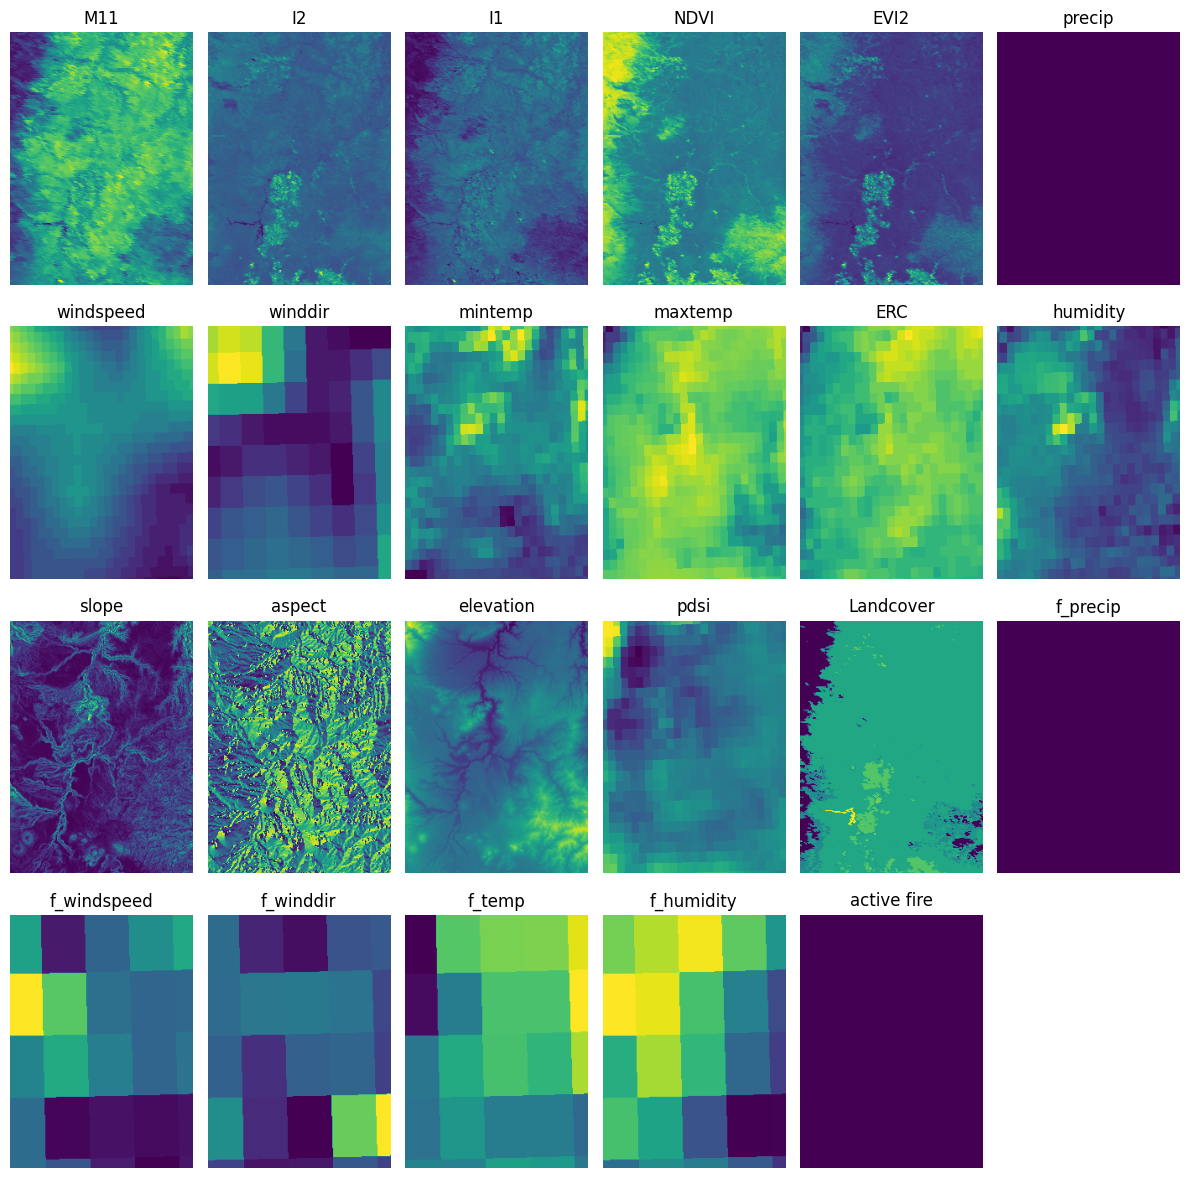

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to the TIFF image
img_path = "/home/sl221120/scratch/Jake/2021/fire_25205260/2021-06-27.tif"
img_path_g = "/home/sl221120/scratch/WildfireSpreadTS/2021/fire_25205260/2021-06-27.tif"

with rasterio.open(img_path_g, 'r') as f:
    img = f.read()

labels =        {0: 'M11',
                1: 'I2',
                2: 'I1',
                3: 'NDVI',
                4: 'EVI2',
                5: 'precip',
                6: 'windspeed',
                7: 'winddir',
                8: 'mintemp',
                9: 'maxtemp',
                10: 'ERC',
                11: 'humidity',
                12: 'slope',
                13: 'aspect',
                14: 'elevation',
                15: 'pdsi',
                16: 'Landcover',
                17: 'f_precip',
                18: 'f_windspeed',
                19: 'f_winddir',
                20: 'f_temp',
                21: 'f_humidity',
                22: 'active fire'}
fig, ax = plt.subplots(4,6, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<=22:
        current_ax.imshow(np.nan_to_num(img[i,...],0.0))
        current_ax.set_title(labels[i])
plt.tight_layout()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

# Load both images
img_path = "/home/sl221120/scratch/Jake/2021/fire_25205260/2021-06-27.tif"
img_path_g = "/home/sl221120/scratch/WildfireSpreadTS/2021/fire_25205260/2021-06-27.tif"

with rasterio.open(img_path) as f1, rasterio.open(img_path_g) as f2:
    img1 = f1.read()
    img2 = f2.read()

# Ensure both images have the same shape
assert img1.shape == img2.shape, "Images have different shapes!"

# Compute the percentage difference
percentage_difference = np.abs(img1 - img2) / (np.abs(img1) + 1e-6) * 100  # Avoid division by zero

# Define band labels
labels = {
    0: 'M11', 1: 'I2', 2: 'I1', 3: 'NDVI', 4: 'EVI2', 5: 'precip',
    6: 'windspeed', 7: 'winddir', 8: 'mintemp', 9: 'maxtemp', 10: 'ERC',
    11: 'humidity', 12: 'slope', 13: 'aspect', 14: 'elevation', 15: 'pdsi',
    16: 'Landcover', 17: 'f_precip', 18: 'f_windspeed', 19: 'f_winddir',
    20: 'f_temp', 21: 'f_humidity', 22: 'active fire'
}

# Compute summary statistics
mean_diff = np.mean(percentage_difference, axis=(1, 2))
max_diff = np.max(percentage_difference, axis=(1, 2))
min_diff = np.min(percentage_difference, axis=(1, 2))

# Create a summary table
diff_summary = pd.DataFrame({
    "Band": [labels[i] for i in range(percentage_difference.shape[0])],
    "Mean % Difference": mean_diff,
    "Max % Difference": max_diff,
    "Min % Difference": min_diff
})

# Display the summary table
diff_summary

Band  Mean % Difference  Max % Difference  Min % Difference
0           M11       0.000000e+00      0.000000e+00               0.0
1            I2       0.000000e+00      0.000000e+00               0.0
2            I1       0.000000e+00      0.000000e+00               0.0
3          NDVI       0.000000e+00      0.000000e+00               0.0
4          EVI2       0.000000e+00      0.000000e+00               0.0
5        precip       0.000000e+00      0.000000e+00               0.0
6     windspeed       0.000000e+00      0.000000e+00               0.0
7       winddir       0.000000e+00      0.000000e+00               0.0
8       mintemp       0.000000e+00      0.000000e+00               0.0
9       maxtemp       0.000000e+00      0.000000e+00               0.0
10          ERC       0.000000e+00      0.000000e+00               0.0
11     humidity       0.000000e+00      0.000000e+00               0.0
12        slope       8.978551e+04      5.587086e+08               0.0
13       aspect       2.478683e+08      3.592102e+10               0.0
14    elevation       1.469045e+00      5.166666e+01               0.0
15         pdsi       0.000000e+00      0.000000e+00               0.0
16    Landcover       0.000000e+00      0.000000e+00               0.0
17     f_precip       0.000000e+00      0.000000e+00               0.0
18  f_windspeed       0.000000e+00      0.000000e+00               0.0
19    f_winddir       0.000000e+00      0.000000e+00               0.0
20       f_temp       0.000000e+00      0.000000e+00               0.0
21   f_humidity       0.000000e+00      0.000000e+00               0.0
22  active fire                NaN               NaN               NaN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


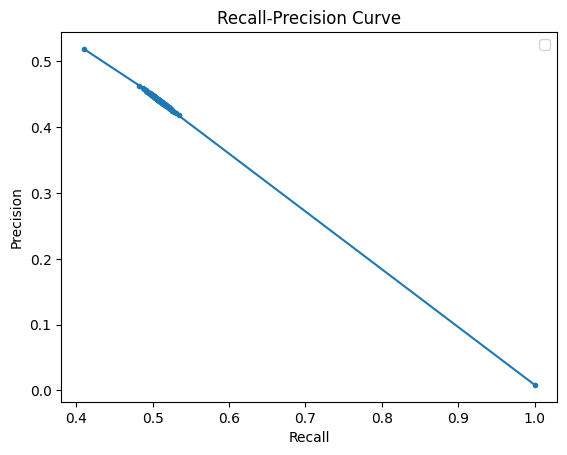

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load saved precision, recall, and thresholds
data = np.load("/home/sl221120/WildfireSpreadTS/test_pr_curve_data.npz")
precision = data["precision"]
recall = data["recall"]
thresholds = data["thresholds"]

# Trim precision and recall to match thresholds' length
precision = precision[:-1]
recall = recall[:-1]

# Plot the PR curve
fig, ax = plt.subplots()
ax.plot(recall, precision, marker='.')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
plt.title("Recall-Precision Curve")
plt.show()


In [21]:
import os
import rasterio
import numpy as np
import pandas as pd

# Directories containing the TIFF images
jake_dir = "/home/sl221120/scratch/Jake/2021/"
gerard_dir = "/home/sl221120/scratch/WildfireSpreadTS/2021/"

# Dictionary to store cumulative stats
all_stats = {i: {"sum": 0, "count": 0, "max": float("-inf"), "min": float("inf")} for i in range(23)}

# Iterate through subfolders
for fire_id in os.listdir(jake_dir):
    jake_subdir = os.path.join(jake_dir, fire_id)
    gerard_subdir = os.path.join(gerard_dir, fire_id)

    # Iterate through TIFF files
    for filename in os.listdir(jake_subdir):
        jake_path = os.path.join(jake_subdir, filename)
        gerard_path = os.path.join(gerard_subdir, filename)

        # Read the images
        with rasterio.open(jake_path) as f1, rasterio.open(gerard_path) as f2:
            img1 = f1.read()
            img2 = f2.read()

        # Compute absolute difference
        difference = np.abs(img1 - img2)

        # Update cumulative statistics
        for i in range(difference.shape[0]):
            all_stats[i]["sum"] += np.sum(difference[i])
            all_stats[i]["count"] += difference[i].size
            all_stats[i]["max"] = max(all_stats[i]["max"], np.max(difference[i]))
            all_stats[i]["min"] = min(all_stats[i]["min"], np.min(difference[i]))

# Compute final statistics
labels = {
    0: 'M11', 1: 'I2', 2: 'I1', 3: 'NDVI', 4: 'EVI2', 5: 'precip',
    6: 'windspeed', 7: 'winddir', 8: 'mintemp', 9: 'maxtemp', 10: 'ERC',
    11: 'humidity', 12: 'slope', 13: 'aspect', 14: 'elevation', 15: 'pdsi',
    16: 'Landcover', 17: 'f_precip', 18: 'f_windspeed', 19: 'f_winddir',
    20: 'f_temp', 21: 'f_humidity', 22: 'active fire'
}

final_stats = {
    "Band": [labels[i] for i in range(23)],
    "Mean Difference": [all_stats[i]["sum"] / all_stats[i]["count"] if all_stats[i]["count"] > 0 else 0 for i in range(23)],
    "Max Difference": [all_stats[i]["max"] for i in range(23)],
    "Min Difference": [all_stats[i]["min"] for i in range(23)]
}

# Create DataFrame and display
diff_summary_df = pd.DataFrame(final_stats)
diff_summary_df

Band  Mean Difference  Max Difference  Min Difference
0           M11              NaN    6.488000e+03             0.0
1            I2              NaN    9.946000e+03             0.0
2            I1              NaN    1.072600e+04             0.0
3          NDVI              NaN    9.831000e+03             0.0
4          EVI2              NaN    6.069000e+03             0.0
5        precip              NaN    0.000000e+00             0.0
6     windspeed              NaN    0.000000e+00             0.0
7       winddir              NaN    0.000000e+00             0.0
8       mintemp              NaN    0.000000e+00             0.0
9       maxtemp              NaN    0.000000e+00             0.0
10          ERC              NaN    0.000000e+00             0.0
11     humidity              NaN    0.000000e+00             0.0
12        slope              NaN    4.139145e+01             0.0
13       aspect              NaN    3.597236e+02             0.0
14    elevation              NaN    5.190000e+02             0.0
15         pdsi              NaN    1.185000e+00             0.0
16    Landcover         0.000000    0.000000e+00             0.0
17     f_precip         0.285942    7.718750e+01             0.0
18  f_windspeed         0.004600    2.771528e+00             0.0
19    f_winddir         0.297685    1.605848e+02             0.0
20       f_temp         0.008741    3.879400e+00             0.0
21   f_humidity         0.000002    2.594267e-03             0.0
22  active fire              NaN            -inf             inf

In [2]:
import pandas as pd
from itertools import combinations

def analyze_test_ap(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    if 'data.data_fold_id' not in data.columns or 'test_AP' not in data.columns:
        raise ValueError("The dataset must contain 'data.data_fold_id' and 'test_AP' columns.")

    # Group by fold ID and compute mean test_AP for each fold
    split_means = data.groupby('data.data_fold_id')['test_AP'].mean()

    # Compute the overall average test_AP
    overall_avg_test_ap = split_means.mean()

    # Generate all combinations of 4 splits
    split_ids = split_means.index
    all_combinations = list(combinations(split_ids, 4))

    # Compute the average test_AP for each combination and calculate proximity to the overall average
    combination_results = []
    for combination in all_combinations:
        # Compute the mean test_AP for the current combination
        avg_test_ap = split_means.loc[list(combination)].mean()

        # Calculate the difference from the overall mean
        difference = abs(avg_test_ap - overall_avg_test_ap)

        # Store results for analysis
        combination_results.append({
            'Combination': combination,
            'Average Test AP': avg_test_ap,
            'Difference from Overall Average': difference
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(combination_results)

    # Rank the combinations by proximity to the overall average
    ranked_results = results_df.nsmallest(len(results_df), 'Difference from Overall Average')

    return overall_avg_test_ap, ranked_results

# Example usage
file_path = '/home/sl221120/WildfireSpreadTS/results/swin_multi_veg.csv'  # Replace with your actual file path
try:
    overall_avg, ranked_combinations = analyze_test_ap(file_path)
    print("Overall Test AP:", overall_avg)
    print("Ranked Combinations:")
    print(ranked_combinations.head(10))  # Display the top 10 combinations
except ValueError as e:
    print(e)


Overall Test AP: 0.36177830149730045
Ranked Combinations:
        Combination  Average Test AP  Difference from Overall Average
246   (1, 4, 8, 11)         0.361878                         0.000100
200  (1, 2, 10, 11)         0.361640                         0.000138
181    (1, 2, 5, 7)         0.361954                         0.000176
160  (0, 7, 10, 11)         0.362117                         0.000338
254   (1, 5, 6, 11)         0.361422                         0.000356
282   (1, 8, 9, 11)         0.362199                         0.000420
172   (1, 2, 3, 11)         0.362825                         0.001047
102   (0, 3, 7, 11)         0.363302                         0.001524
274  (1, 6, 10, 11)         0.363427                         0.001649
248   (1, 4, 9, 11)         0.363435                         0.001657


In [3]:
from pytorch_lightning.utilities import rank_zero_only
import torch
from dataloader.FireSpreadDataModule import FireSpreadDataModule
from pytorch_lightning.cli import LightningCLI
from models import SMPModel, BaseModel, ConvLSTMLightning, LogisticRegression  # noqa
from models import BaseModel
import wandb
import os
from dataloader.FireSpreadDataset import FireSpreadDataset
from dataloader.utils import get_means_stds_missing_values
from PIL import Image
import torch.nn.functional as F

/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/sl221120/anaconda3/envs/fire_ts/lib/py

In [4]:
import torch
from dataloader.FireSpreadDataModule import FireSpreadDataModule

# Define the necessary parameters
data_dir = '/home/sl221120/scratch/WildfireSpreadTS_HDF5'
batch_size = 32
n_leading_observations = 1
n_leading_observations_test_adjustment = 5  # Adjust based on your requirement
crop_side_length = 128  # Example value, adjust as needed
load_from_hdf5 = True  # Adjust based on your data format
num_workers = 8  # Number of workers for data loading
remove_duplicate_features = False  # Adjust based on your data preprocessing
features_to_keep = [0, 1, 2, 3, 4, 38, 39]
desired_side_length = 224



In [8]:
# Initialize the data module with the defined parameters
data_module = FireSpreadDataModule(
    data_dir=data_dir,
    batch_size=batch_size,
    n_leading_observations=n_leading_observations,
    n_leading_observations_test_adjustment=n_leading_observations_test_adjustment,
    crop_side_length=crop_side_length,
    load_from_hdf5=load_from_hdf5,
    num_workers=num_workers,
    remove_duplicate_features=remove_duplicate_features,
    features_to_keep=features_to_keep,
    desired_side_length=desired_side_length,
    return_doy=True,
    data_fold_id = 0
)

# Setup the data module to prepare the datasets
data_module.setup(stage="")

# Get a batch from the training data loader
train_dataloader = data_module.train_dataloader()
# data_iter = iter(train_dataloader)
# sample_data, _ = next(data_iter)

# Print the shape of the sample data
# 

# Fetch a batch
for batch in train_dataloader:
    # Break after getting the first batch
    inputs, label, doy = batch
    print(f"Sample data shape: {inputs.shape}")
    break

Using the following dataset split:
Train years: [2018, 2019], Val years: [2020], Test years: [2021]
Sample data shape: torch.Size([32, 1, 7, 128, 128])


In [ ]:
doy

In [20]:
x = inputs[0, 0, ...]
print(x.shape)

torch.Size([7, 128, 128])


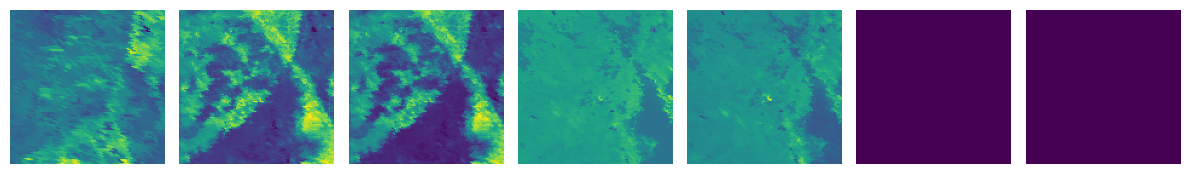

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,7, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<7:
        current_ax.imshow(np.nan_to_num(x[i,...],0.0))
plt.tight_layout()

In [9]:
from torch.utils.data import Subset

def filter_dataset(dataset):
    valid_indices = []
    total_samples = len(dataset)
    kept = 0
    discarded_no_y_fire = 0
    discarded_with_y_fire = 0
    
    for idx in range(total_samples):
        sample = dataset[idx]
        inputs = sample[0]  # Shape: [1, 7, 128, 128]
        x_af = inputs[:, -1, :, :]  # Active fire mask
        
        # Check current fire presence
        if torch.sum(x_af == 1) > 1:  # Original filtering condition
            valid_indices.append(idx)
            kept += 1
        else:
            # Check next day's fire presence
            y = sample[1].squeeze()  # Remove singleton dimensions
            y_fire_pixels = torch.sum(y == 1).item()
            
            if y_fire_pixels > 0:
                discarded_with_y_fire += 1
            else:
                discarded_no_y_fire += 1
    
    # Print detailed statistics
    print(f"Total samples: {total_samples}")
    print(f"Kept samples (current fire): {kept} ({kept/total_samples:.2%})")
    print(f"Discarded samples: {total_samples - kept} ({(total_samples - kept)/total_samples:.2%})")
    print("  Discarded breakdown:")
    print(f"  - No future fire: {discarded_no_y_fire} ({discarded_no_y_fire/total_samples:.2%})")
    print(f"  - Has future fire: {discarded_with_y_fire} ({discarded_with_y_fire/total_samples:.2%})")
    
    return Subset(dataset, valid_indices), (kept, discarded_no_y_fire, discarded_with_y_fire)

In [10]:
# After filtering, create subsets for discarded samples
def get_discarded_subset(original_dataset, filtered_subset):
    all_indices = set(range(len(original_dataset)))
    kept_indices = set(filtered_subset.indices)
    discarded_indices = list(all_indices - kept_indices)
    return Subset(original_dataset, discarded_indices)

# Get original datasets before filtering (access them before they get replaced)
original_train = data_module.train_dataset
original_val = data_module.val_dataset
original_test = data_module.test_dataset

# Apply filtering (this replaces the datasets with filtered versions)
data_module.train_dataset = filter_dataset(original_train)
data_module.val_dataset = filter_dataset(original_val)
data_module.test_dataset = filter_dataset(original_test)

# Create discarded subsets
discarded_train = get_discarded_subset(original_train, data_module.train_dataset)
discarded_val = get_discarded_subset(original_val, data_module.val_dataset)
discarded_test = get_discarded_subset(original_test, data_module.test_dataset)


Total samples: 4948
Kept samples (current fire): 1251 (25.28%)
Discarded samples: 3697 (74.72%)
  Discarded breakdown:
  - No future fire: 3336 (67.42%)
  - Has future fire: 361 (7.30%)
Total samples: 4091
Kept samples (current fire): 2308 (56.42%)
Discarded samples: 1783 (43.58%)
  Discarded breakdown:
  - No future fire: 1388 (33.93%)
  - Has future fire: 395 (9.66%)
Total samples: 3337
Kept samples (current fire): 2182 (65.39%)
Discarded samples: 1155 (34.61%)
  Discarded breakdown:
  - No future fire: 894 (26.79%)
  - Has future fire: 261 (7.82%)


AttributeError: 'tuple' object has no attribute 'indices'

In [47]:
def visualize_samples(subset, title, num_samples=6):
    import matplotlib.pyplot as plt
    import numpy as np
    
    for sample_idx in range(num_samples):
        sample = subset[sample_idx]
        inputs = sample[0]  # Shape: [1, 7, 128, 128]
        y = sample[1]       # Next day mask (label)
        
        # Remove temporal dimensions
        x = inputs[0]       # → [7, 128, 128]
        y = y.squeeze()     # → [128, 128] (remove batch and channel dims if present)
        
        fig, ax = plt.subplots(1, 8, figsize=(24, 3))  # Added column for y
        plt.subplots_adjust(wspace=0.1)
        
        # Plot input channels
        for i in range(7):
            ax[i].axis('off')
            channel_data = x[i].numpy()
            ax[i].imshow(np.nan_to_num(channel_data, 0.0), cmap='viridis')
            if i == 6:
                ax[i].set_title(f'x_af (current)\n sum:: {torch.sum(x[i]).item()}', color='red', fontsize=8)
            else:
                ax[i].set_title(f'Channel {i}', fontsize=8)
        
        # Plot next day mask (y)
        ax[7].axis('off')
        y_data = y.numpy() if torch.is_tensor(y) else y
        ax[7].imshow(np.nan_to_num(y_data, 0.0), cmap='viridis')  # Different colormap for emphasis
        ax[7].set_title(f'Next Day Mask (y)\n sum: {torch.sum(y).item()}', color='green', fontsize=8)
        
        plt.suptitle(f"{title} - Sample {sample_idx+1}", y=1.1)
        plt.tight_layout()
        plt.show()


Visualizing discarded training samples:


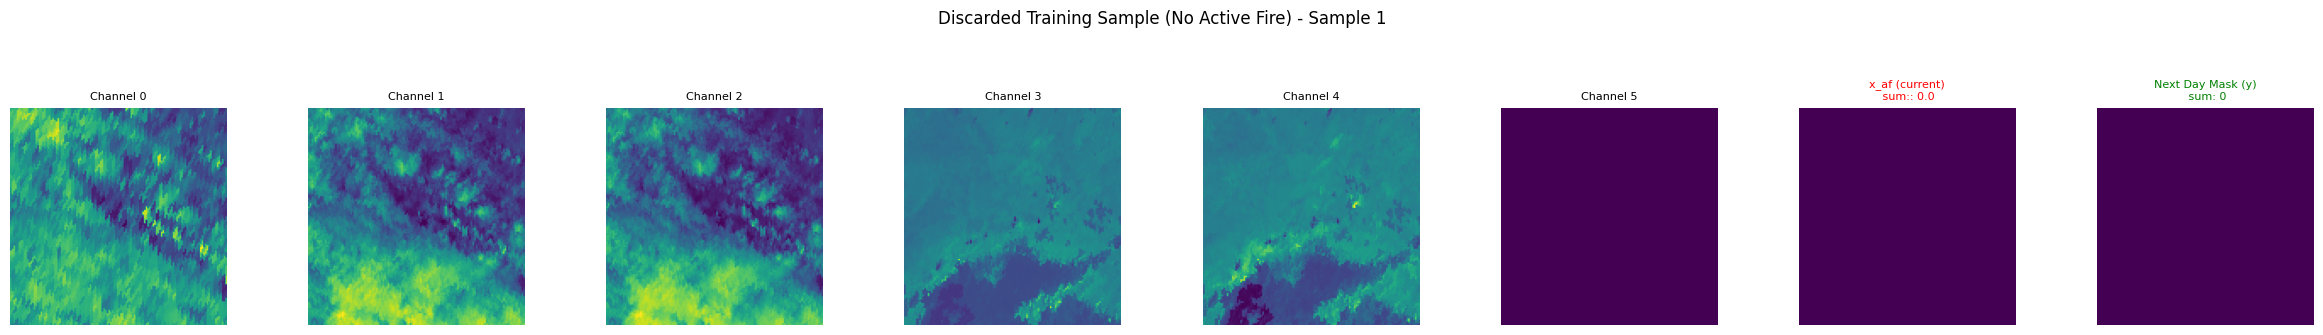

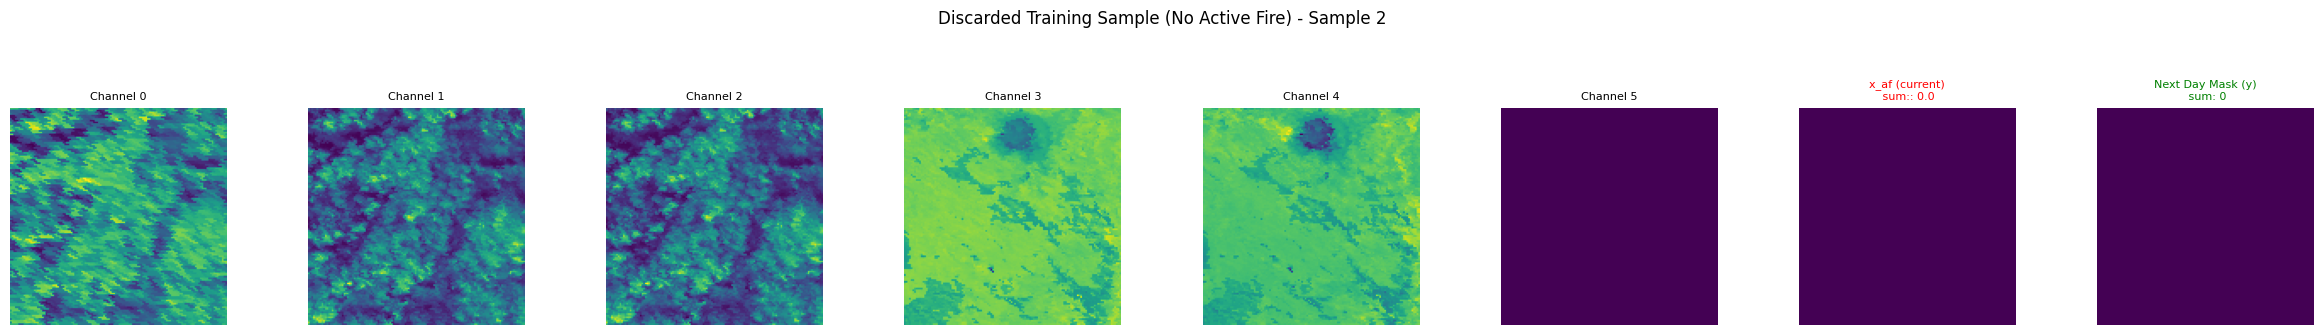

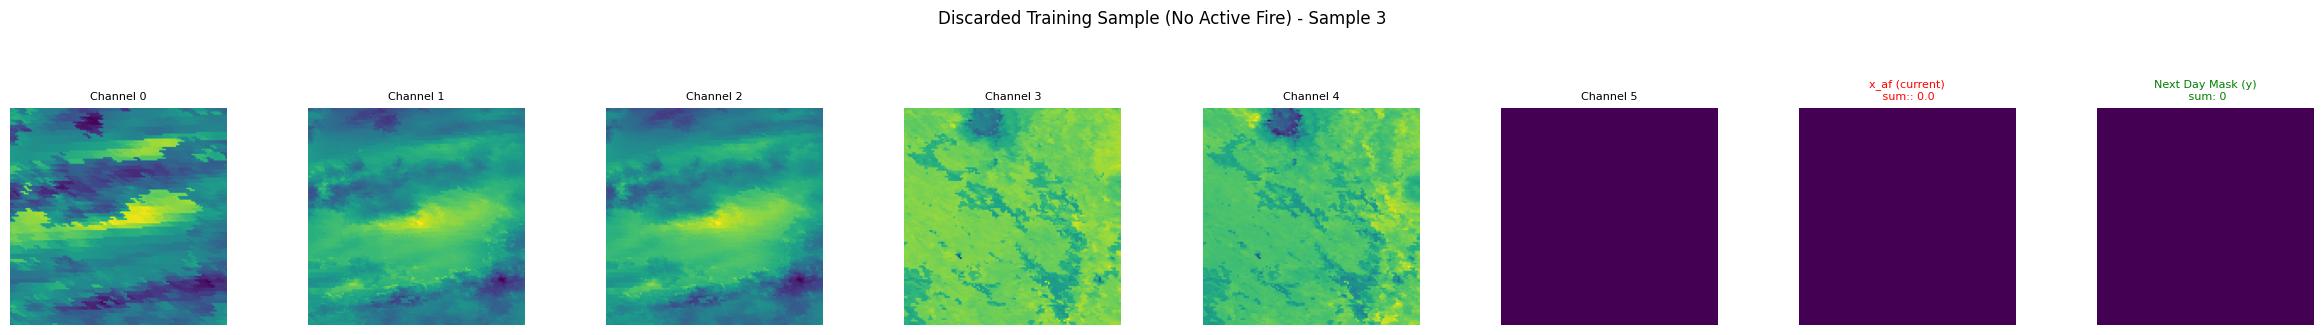

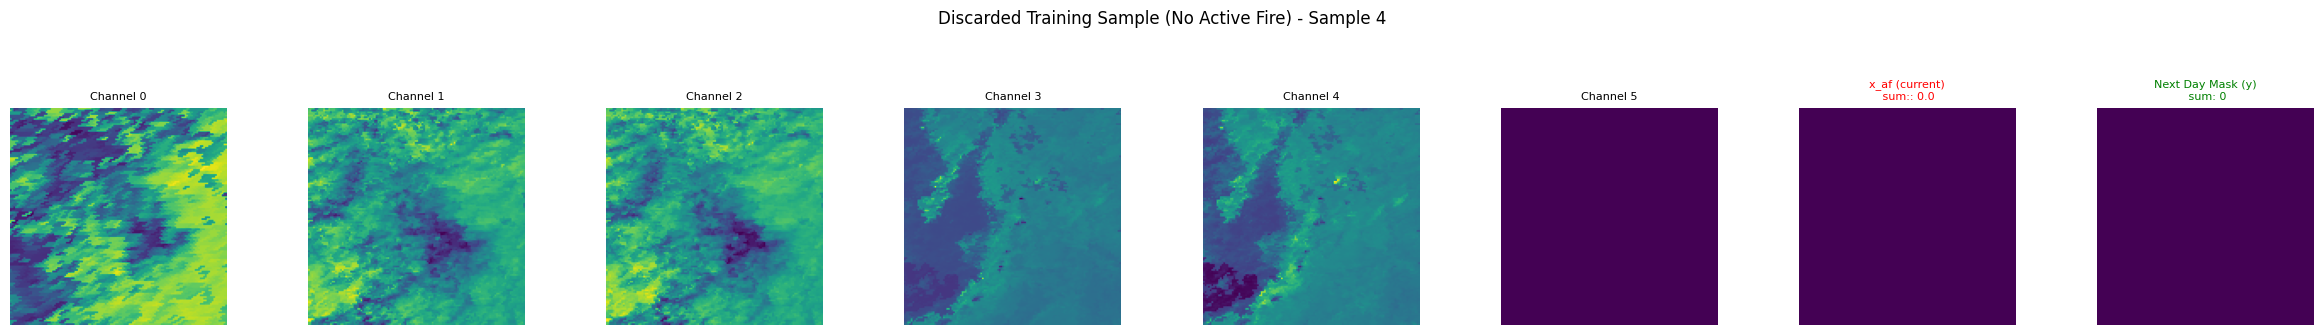

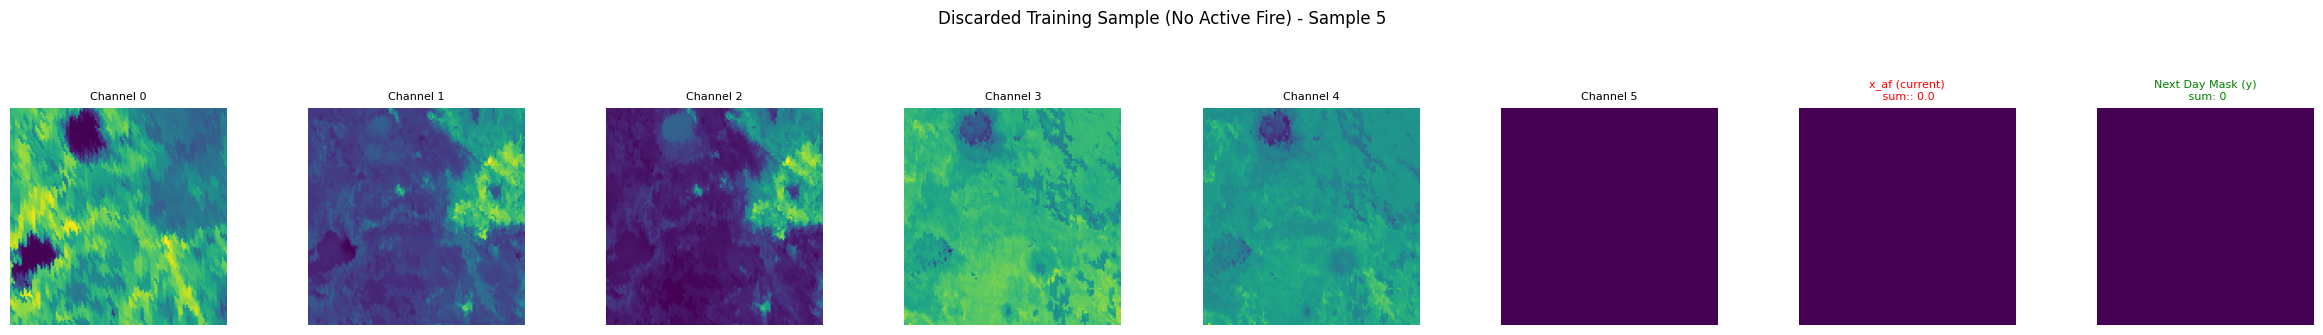

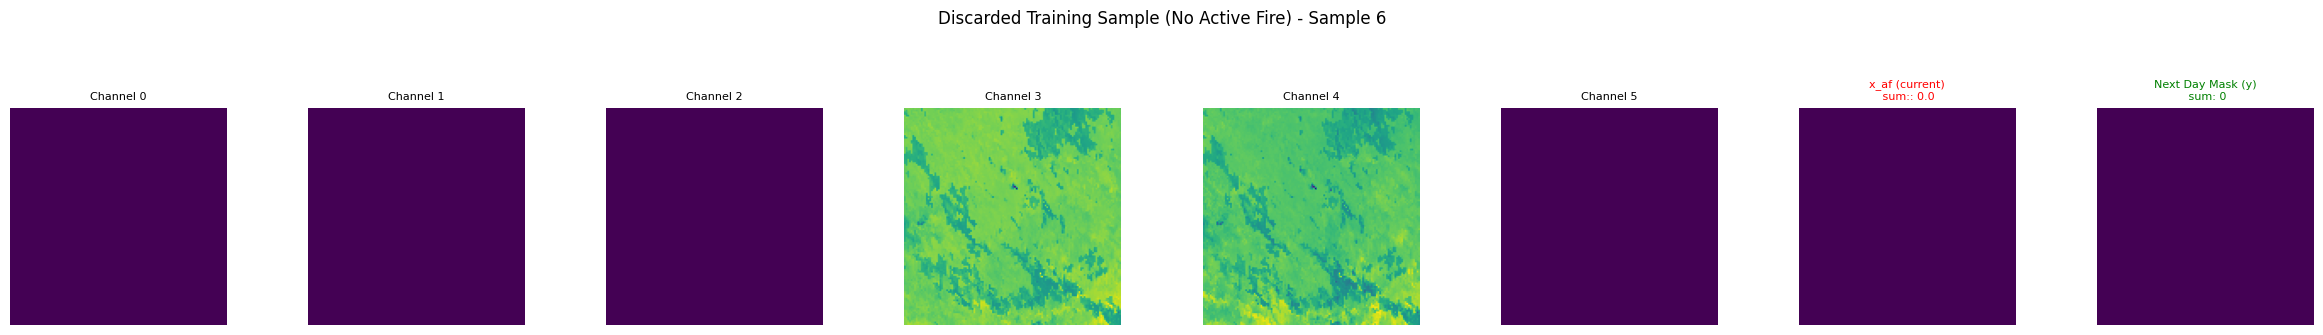


Visualizing kept training samples:


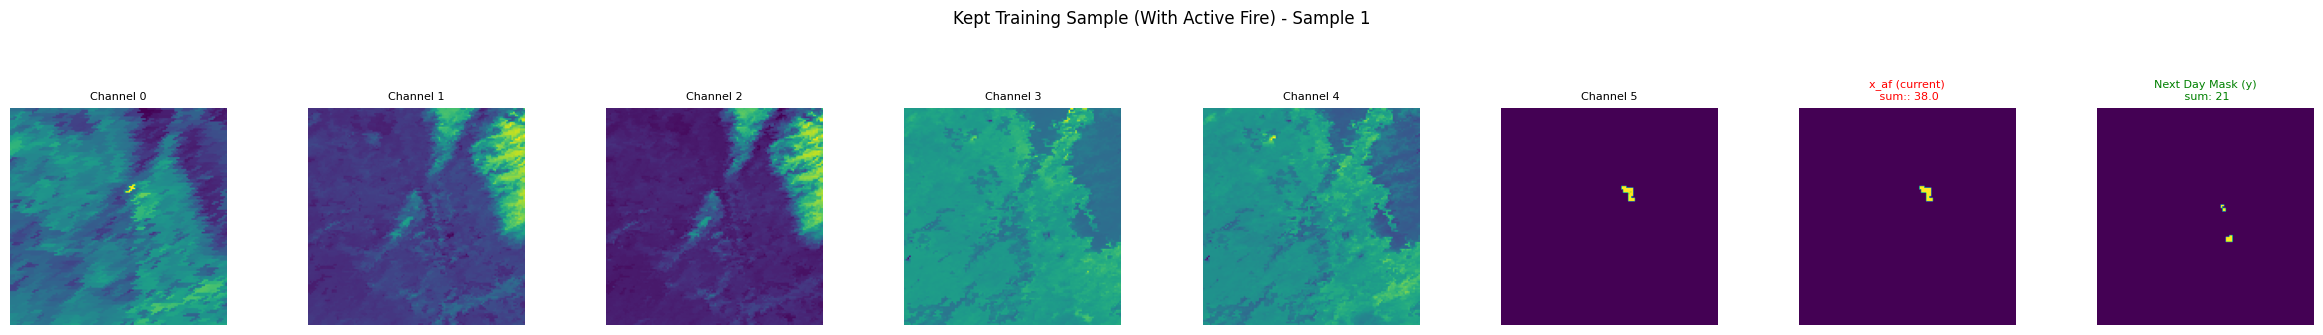

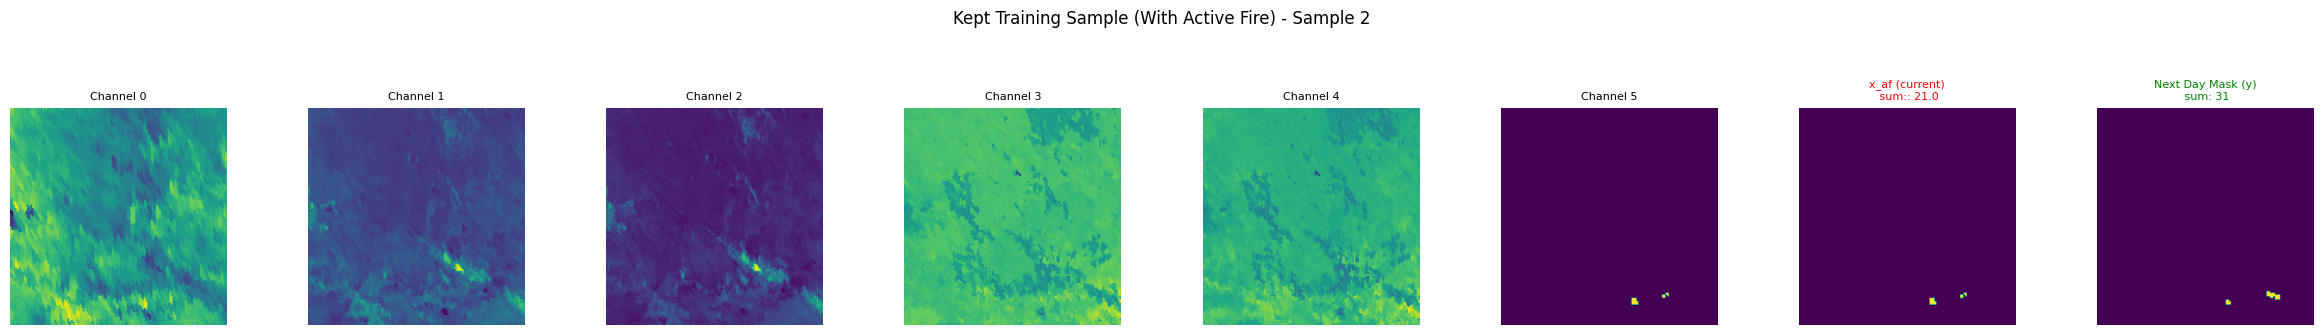

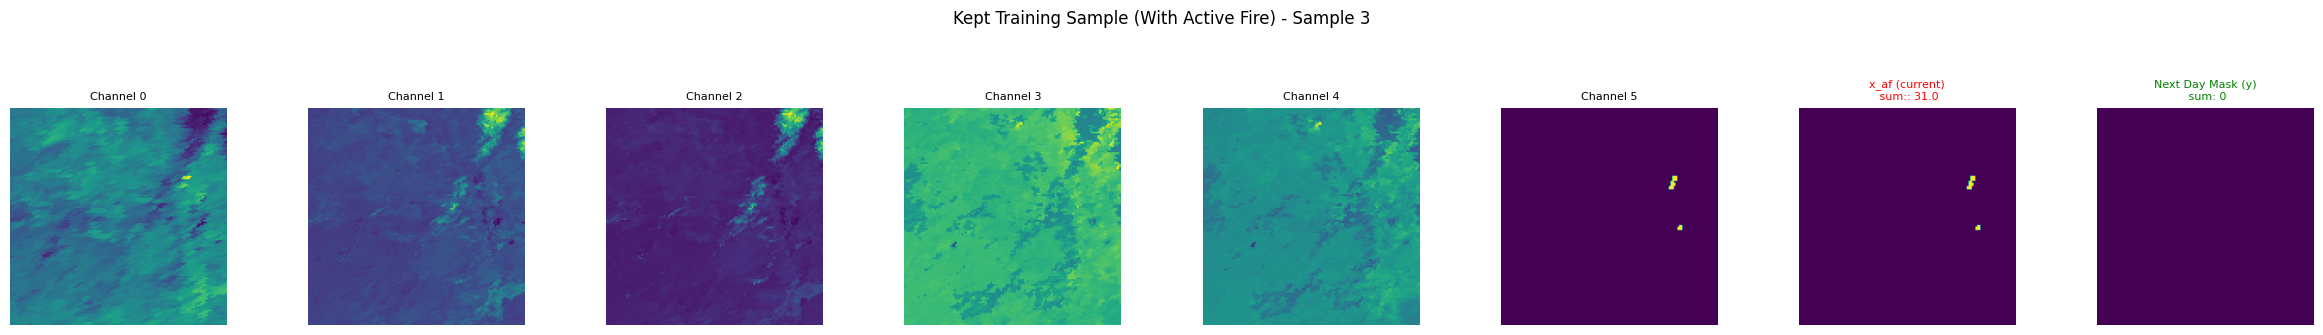

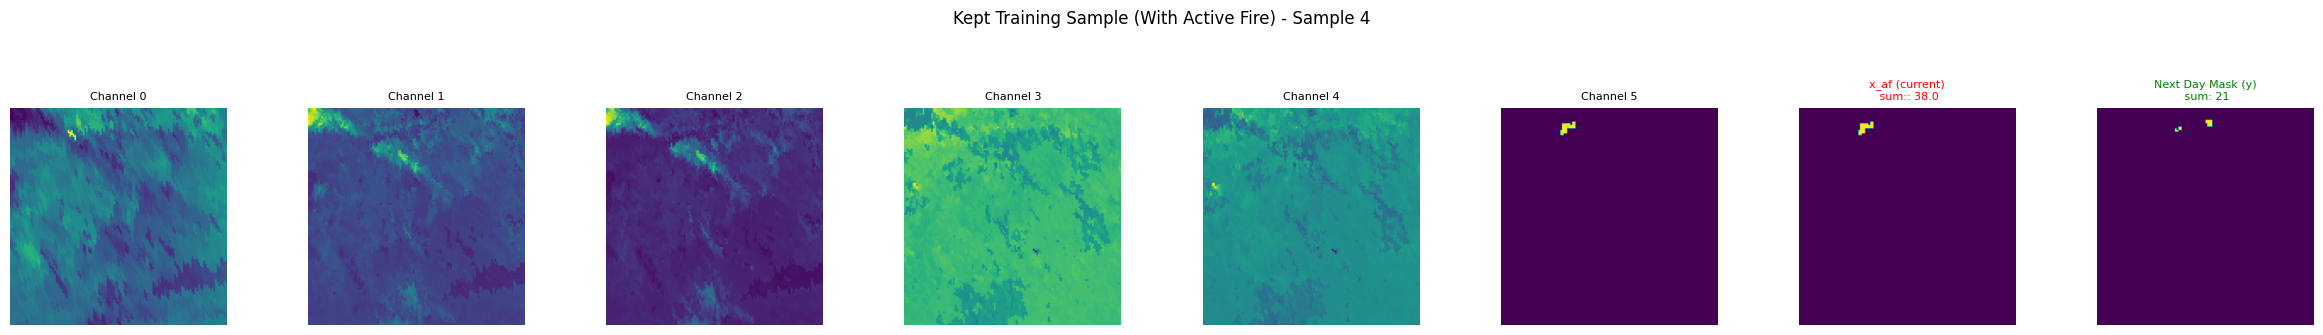

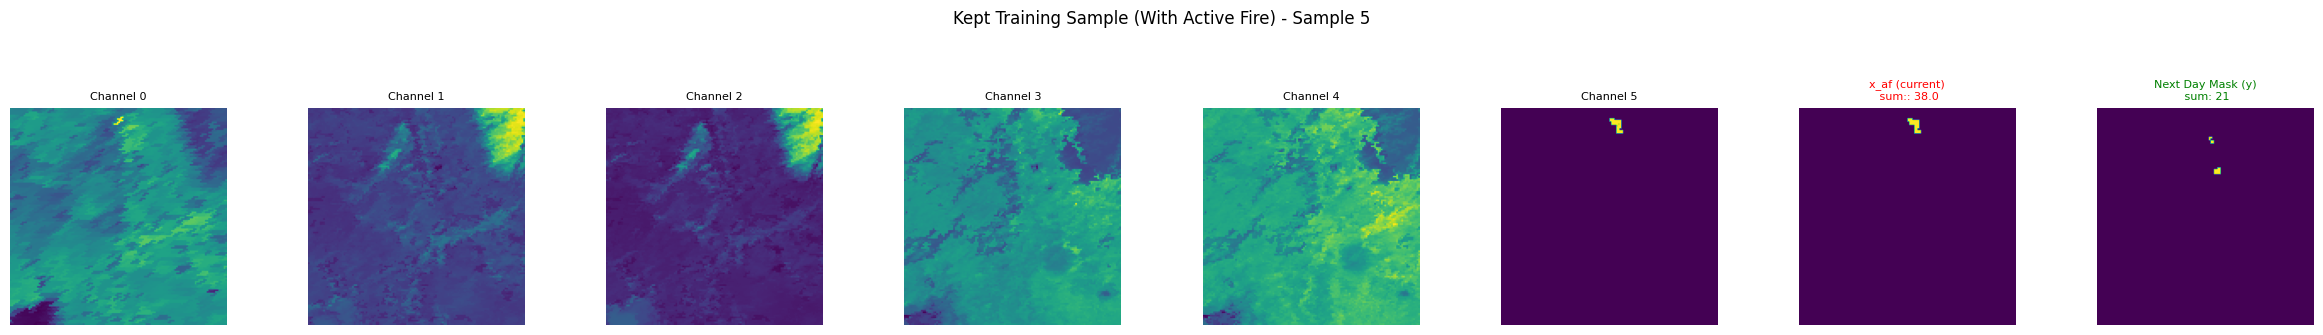

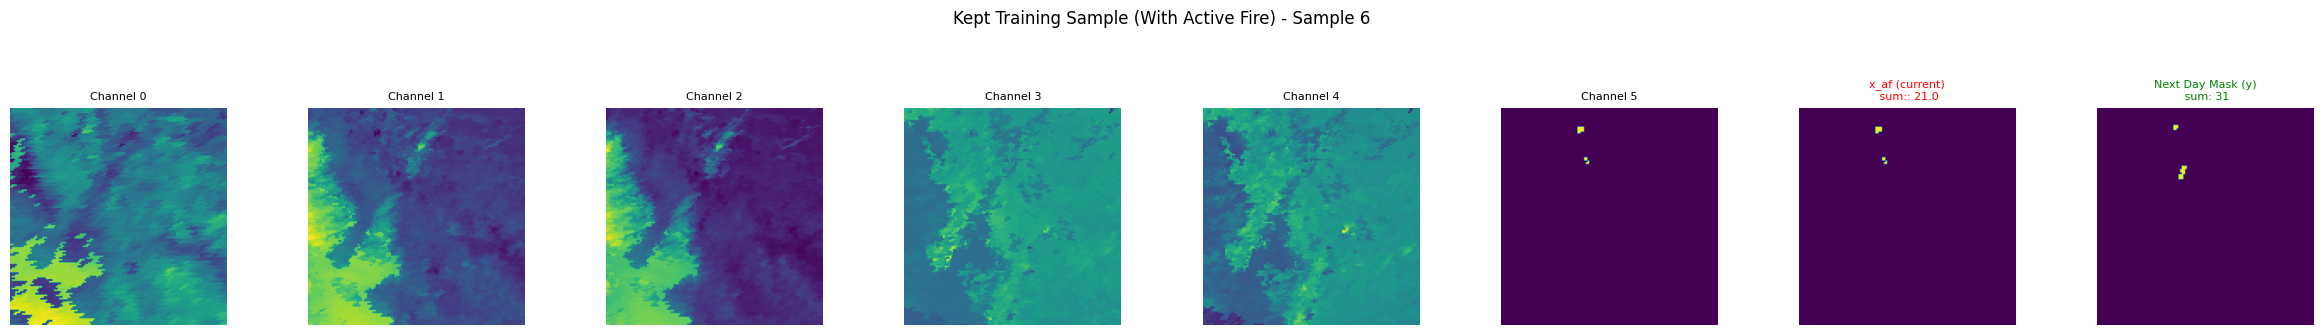

In [48]:
print("\nVisualizing discarded training samples:")
visualize_samples(discarded_train, "Discarded Training Sample (No Active Fire)")

# Optional: Visualize kept samples for comparison
print("\nVisualizing kept training samples:")
visualize_samples(data_module.train_dataset, "Kept Training Sample (With Active Fire)")


In [23]:
print("Filtering training set:")
data_module.train_dataset = filter_dataset(data_module.train_dataset)

Filtering training set:
Kept 1154/4948 samples (23.32%)


In [2]:
import torch
from sklearn.metrics import average_precision_score

# Load the saved predictions
fire_masks_combined = torch.load("/home/sl221120/WildfireSpreadTS/lightning_logs/predictions_yk5mqmpg.pt")

# Unpack the tensors (assuming dim 0 contains: [x_af, y_hat, y])
x_af = fire_masks_combined[0]  # Shape: (num_samples, height, width)
y_hat = fire_masks_combined[1]  # Model predictions
y_true = fire_masks_combined[2]  # Ground truth

# 1. Compute overall test Average Precision
def compute_ap(preds, targets):
    return average_precision_score(targets.flatten().numpy(), 
                                 preds.flatten().numpy())

overall_ap = compute_ap(y_hat, y_true)
print(f"Overall Test AP: {overall_ap:.4f}")

# 2. Filter data based on fire pixels in x_af
fire_pixel_counts = x_af.sum(dim=(1, 2))  # Sum over spatial dimensions

# Create masks for different fire regimes
gt1_mask = fire_pixel_counts > 1
eq0_mask = fire_pixel_counts == 0

# 3. Compute AP for filtered groups
def masked_ap(mask):
    if not mask.any():
        return None
    return compute_ap(y_hat[mask], y_true[mask])

ap_gt1 = masked_ap(gt1_mask)
ap_eq0 = masked_ap(eq0_mask)

print(f"AP for samples with >1 fire pixels: {ap_gt1 or 'N/A':.4f}")
print(f"AP for samples with 0 fire pixels: {ap_eq0 or 'N/A':.4f}")

Overall Test AP: 0.2348
AP for samples with >1 fire pixels: 0.2728
AP for samples with 0 fire pixels: 0.0005


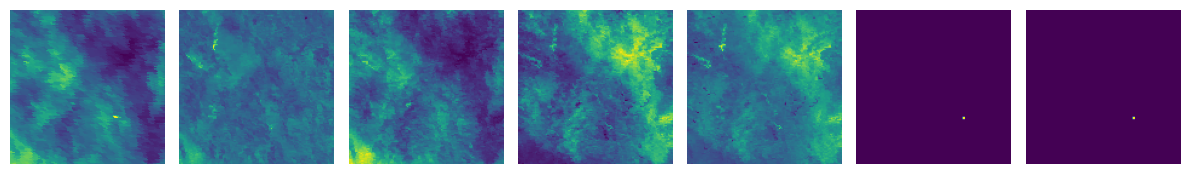

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,7, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<7:
        current_ax.imshow(np.nan_to_num(x[i,...],0.0))
plt.tight_layout()

Now padding

Zero padded images now have shape: torch.Size([7, 224, 224])


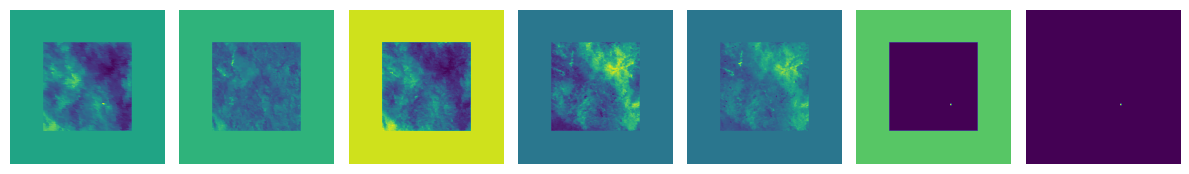

In [14]:
T, H, W = x.shape
crop_side_length = 224
if H < crop_side_length or W < crop_side_length:
    pad_height = max(0, crop_side_length - H)
    pad_width = max(0, crop_side_length - W)

    padding = (pad_width // 2, pad_width - pad_width // 2,  # Left, right
            pad_height // 2, pad_height - pad_height // 2)  # Top, bottom
    
    # Apply padding to both x and y
    x = torch.nn.functional.pad(x, padding)
print(f"Zero padded images now have shape: {x.shape}")

fig, ax = plt.subplots(1,7, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<7:
        current_ax.imshow(np.nan_to_num(x[i,...],0.0))
plt.tight_layout()

In [39]:
import torch
from torch.utils.data import DataLoader
from dataloader.FireSpreadDataset import FireSpreadDataset


data_dir = "/home/sl221120/scratch/WildfireSpreadTS_HDF5"
included_fire_years = [2017, 2018, 2019]
n_leading_observations = 5
crop_side_length = 128
load_from_hdf5 = True
is_train = True
remove_duplicate_features = True
stats_years = (2018, 2019)
n_leading_observations_test_adjustment = 5
features_to_keep = [0, 1, 2, 3, 4, 38, 39]
return_doy = False

dataset = FireSpreadDataset(
    data_dir=data_dir,
    included_fire_years=included_fire_years,
    n_leading_observations=n_leading_observations,
    crop_side_length=crop_side_length,
    load_from_hdf5=load_from_hdf5,
    is_train=is_train,
    remove_duplicate_features=remove_duplicate_features,
    stats_years=stats_years,
    n_leading_observations_test_adjustment=n_leading_observations_test_adjustment,
    features_to_keep=features_to_keep,
    return_doy=return_doy
)

# Create DataLoader
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Fetch a batch
for batch in data_loader:
    # Break after getting the first batch
    break

# If you want to inspect specific parts of the batch:
inputs, labels = batch
print("Inputs shape: ", inputs.shape)
print("Labels.shape: ", labels.shape)


Inputs shape:  torch.Size([4, 35, 128, 128])
Labels.shape:  torch.Size([4, 128, 128])


In [40]:
data_dir = '/home/sl221120/scratch/WildfireSpreadTS_HDF5/2018'
print(os.listdir(data_dir))

['fire_21890013.hdf5', 'fire_21889990.hdf5', 'fire_21459239.hdf5', 'fire_21890010.hdf5', 'fire_21690102.hdf5', 'fire_21998230.hdf5', 'fire_21890078.hdf5', 'fire_21999321.hdf5', 'fire_21688916.hdf5', 'fire_21804589.hdf5', 'fire_21748801.hdf5', 'fire_21890100.hdf5', 'fire_21890058.hdf5', 'fire_21890143.hdf5', 'fire_21890111.hdf5', 'fire_21890087.hdf5', 'fire_21889763.hdf5', 'fire_21999260.hdf5', 'fire_21690064.hdf5', 'fire_21890106.hdf5', 'fire_22258318.hdf5', 'fire_22141571.hdf5', 'fire_21890101.hdf5', 'fire_21805022.hdf5', 'fire_21998081.hdf5', 'fire_21751305.hdf5', 'fire_22258087.hdf5', 'fire_21890091.hdf5', 'fire_21889994.hdf5', 'fire_21615465.hdf5', 'fire_21804895.hdf5', 'fire_22141461.hdf5', 'fire_22141528.hdf5', 'fire_21999354.hdf5', 'fire_21997864.hdf5', 'fire_21890643.hdf5', 'fire_22141465.hdf5', 'fire_21889953.hdf5', 'fire_21889682.hdf5', 'fire_21748798.hdf5', 'fire_21999299.hdf5', 'fire_21459242.hdf5', 'fire_21889798.hdf5', 'fire_22141195.hdf5', 'fire_21889995.hdf5', 'fire_214

In [41]:
import h5py
from datetime import datetime
filename = "/home/sl221120/scratch/WildfireSpreadTS_HDF5/2018/fire_21890013.hdf5"

in_fire_index = 0
end_index = 6
with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    imgs = f["data"][in_fire_index:end_index]
    doys = f["data"].attrs["img_dates"][in_fire_index:(
        end_index-1)]
    date_format = "%Y-%m-%d"
        # In old preprocessing, the dates still had a TIF file extension, which is also removed here.
    doys = [datetime.strptime(img_date.replace(".tif", ""), date_format).timetuple().tm_yday for img_date in doys]
    #doys = self.img_dates_to_doys(doys)
    doys = torch.Tensor(doys)
    print(doys)





tensor([201., 202., 203., 204., 205.])


In [42]:
import torch
from dataloader.FireSpreadDataModule import FireSpreadDataModule

# Define the necessary parameters
data_dir = '/home/sl221120/scratch/WildfireSpreadTS_HDF5'
batch_size = 1
n_leading_observations = 5  # For 5 days of observation
n_leading_observations_test_adjustment = 5  # Adjust based on your requirement
crop_side_length = 224  # Example value, adjust as needed
load_from_hdf5 = True  # Adjust based on your data format
num_workers = 4  # Number of workers for data loading
remove_duplicate_features = True  # Adjust based on your data preprocessing

# Initialize the data module with the defined parameters
data_module = FireSpreadDataModule(
    data_dir=data_dir,
    batch_size=batch_size,
    n_leading_observations=n_leading_observations,
    n_leading_observations_test_adjustment=n_leading_observations_test_adjustment,
    crop_side_length=crop_side_length,
    load_from_hdf5=load_from_hdf5,
    num_workers=num_workers,
    remove_duplicate_features=remove_duplicate_features
)

# Setup the data module to prepare the datasets
data_module.setup()

# Get a batch from the training data loader
train_dataloader = data_module.train_dataloader()
data_iter = iter(train_dataloader)
sample_data, _ = next(data_iter)

# Print the shape of the sample data
print(f"Sample data shape: {sample_data.shape}")


Using the following dataset split:
Train years: [2018, 2019], Val years: [2020], Test years: [2021]
Sample data shape: torch.Size([1, 120, 224, 224])


In [8]:
n_features = FireSpreadDataset.get_n_features(n_observations=1, features_to_keep=None,
                                              deduplicate_static_features=True)
n_features

40

In [44]:
# Parameters for get_n_features
n_observations = 5  # For 5 days of observation
features_to_keep = None  # Use None to keep all features or specify a list of feature indices to keep
deduplicate_static_features = True  # Adjust based on your data preprocessing

# Call the get_n_features method
n_features = FireSpreadDataset.get_n_features(n_observations, features_to_keep, deduplicate_static_features)

# Print the number of features from get_n_features
print(f"Number of features from get_n_features: {n_features}")

# Compare the number of channels from sample data shape and get_n_features
sample_n_channels = sample_data.shape[1]
print(f"Number of channels from sample data shape: {sample_n_channels}")

# Compare both values
print(f"Comparison - Sample data channels: {sample_n_channels}, Computed features: {n_features}")


Number of features from get_n_features: 120
Number of channels from sample data shape: 120
Comparison - Sample data channels: 120, Computed features: 120


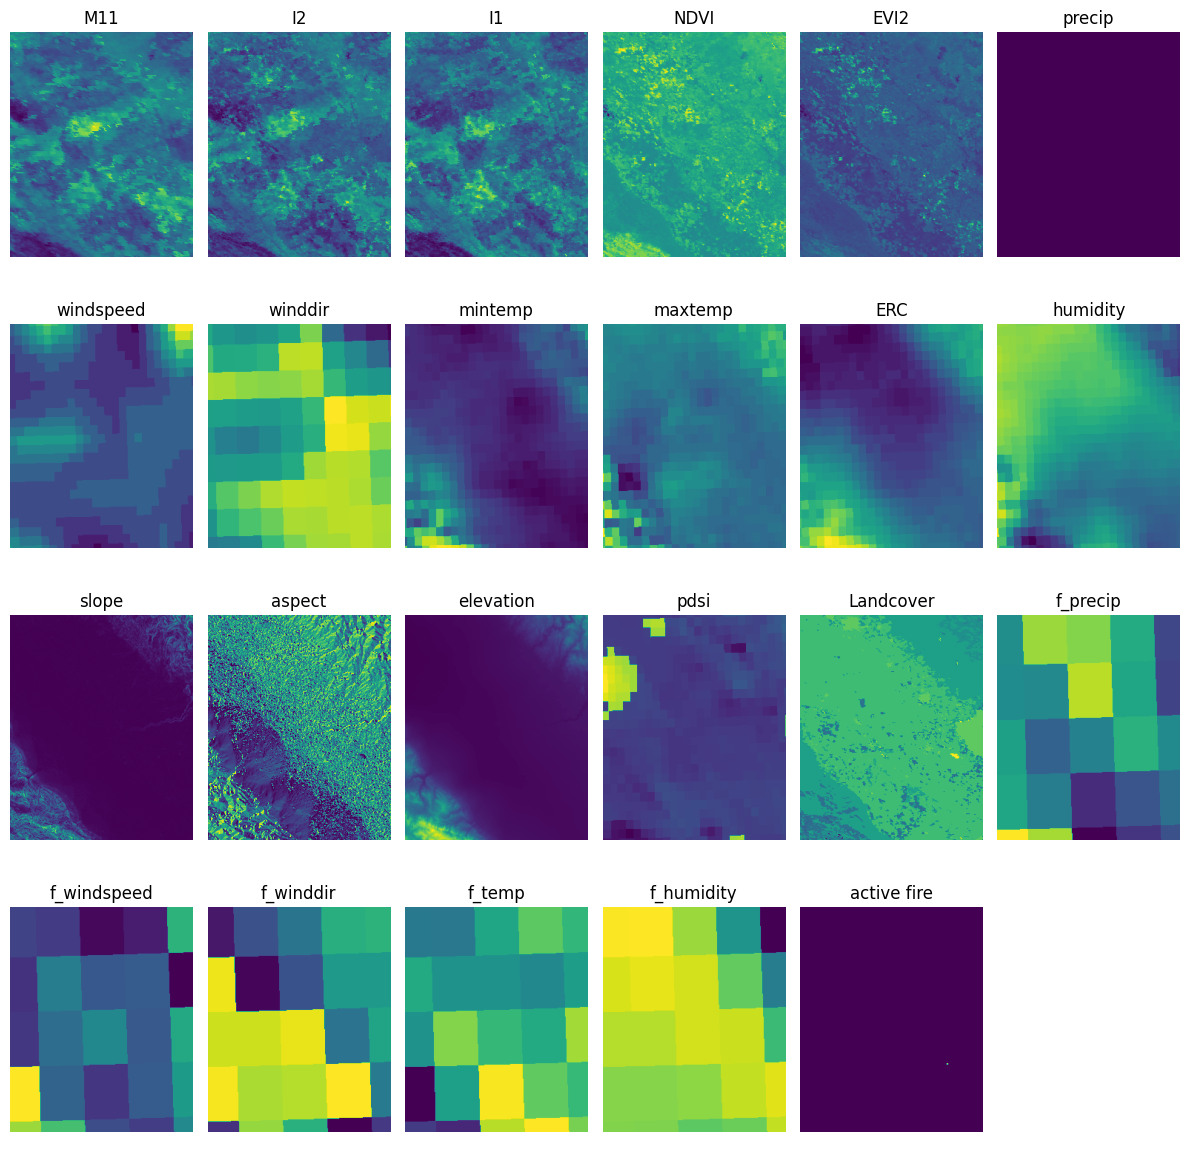

In [45]:
import rasterio
import matplotlib.pyplot as plt   
import numpy as np
import os



img_path = "/home/sl221120/scratch/WildfireSpreadTS/2018/fire_21458798/2018-01-01.tif"
with rasterio.open(img_path, 'r') as f:
    img = f.read()

labels =        {0: 'M11',
                1: 'I2',
                2: 'I1',
                3: 'NDVI',
                4: 'EVI2',
                5: 'precip',
                6: 'windspeed',
                7: 'winddir',
                8: 'mintemp',
                9: 'maxtemp',
                10: 'ERC',
                11: 'humidity',
                12: 'slope',
                13: 'aspect',
                14: 'elevation',
                15: 'pdsi',
                16: 'Landcover',
                17: 'f_precip',
                18: 'f_windspeed',
                19: 'f_winddir',
                20: 'f_temp',
                21: 'f_humidity',
                22: 'active fire'}
fig, ax = plt.subplots(4,6, figsize=(12, 12))
for i, current_ax in enumerate(ax.flat):
    current_ax.axis('off')
    if i<=22:
        current_ax.imshow(np.nan_to_num(img[i,...],0.0))
        current_ax.set_title(labels[i])
plt.tight_layout()
        


Using the following dataset split:
Train years: [2018, 2019], Val years: [2020], Test years: [2021]
Processing batch 1 with shape torch.Size([1, 120, 224, 224])
Processing batch 2 with shape torch.Size([1, 120, 224, 224])
Processing batch 3 with shape torch.Size([1, 120, 224, 224])
Processing batch 4 with shape torch.Size([1, 120, 224, 224])
Processing batch 5 with shape torch.Size([1, 120, 224, 224])
Processing batch 6 with shape torch.Size([1, 120, 224, 224])
Error encountered during iteration: Caught ValueError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/sl221120/anaconda3/envs/fire_ts/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/sl221120/anaconda3/envs/fire

In [19]:
import torch

predictions_file_name="/home/sl636/WildfireSpreadTS/lightning_logs/predictions_gcmiitbv.pt"

fire_masks_combined = torch.load(predictions_file_name)



FileNotFoundError: [Errno 2] No such file or directory: '/home/sl636/WildfireSpreadTS/lightning_logs/predictions_gcmiitbv.pt'

In [20]:
# Extract the input fire masks, predicted fire masks, and ground truth fire masks
x_af = fire_masks_combined[0]
y_hat = fire_masks_combined[1]
y = fire_masks_combined[2]

NameError: name 'fire_masks_combined' is not defined

In [22]:
from torchmetrics import AveragePrecision

# Initialize the AveragePrecision metric
ap_metric = AveragePrecision(task="binary")

# Update the metric with each sample
num_samples = y_hat.shape[0]
for j in range(num_samples):
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())

# Compute the overall average precision
overall_ap_value = ap_metric.compute()
print(f'Overall Average Precision: {overall_ap_value:.4f}')

NameError: name 'y_hat' is not defined

In [23]:
import torch
from torchmetrics import AveragePrecision
import matplotlib.pyplot as plt

# Assume fire_masks_combined is a tensor containing the input, predicted, and ground truth fire masks
# fire_masks_combined.shape should be (3, num_samples, height, width)

# Extract the input fire masks, predicted fire masks, and ground truth fire masks
x_af = fire_masks_combined[0]
y_hat = fire_masks_combined[1]
y = fire_masks_combined[2]

# Initialize a list to store AP values
ap_values = []

# Compute the AP for each sample and store the values
num_samples = y_hat.shape[0]
for j in range(num_samples):
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    ap_values.append(ap_value.item())

# Plot a histogram of AP values
plt.hist(ap_values, bins=20, edgecolor='black')
plt.xlabel('Average Precision')
plt.ylabel('Frequency')
plt.title('Histogram of Average Precision for all 2021 Test Samples')
plt.show()


NameError: name 'fire_masks_combined' is not defined

In [24]:
# Plot a histogram of AP values
plt.hist(ap_values, bins=20, edgecolor='black')
plt.xlabel('Average Precision')
plt.ylabel('Frequency')
plt.title('Histogram of Average Precision for all 2021 Test Samples')
plt.show()

NameError: name 'ap_values' is not defined

In [25]:
import random 
lt_10pc = []
for i in range(x_af.shape[0]):
    if x_af[i].sum() < 1638:
        lt_10pc.append(i)

len(lt_10pc)

plot_lt_10pc = random.sample(lt_10pc, 10)
plot_lt_10pc



NameError: name 'x_af' is not defined

In [26]:
import matplotlib.pyplot as plt
import torch
from torchmetrics import AveragePrecision

# Assume x_af, y, and y_hat are already defined as torch tensors

def apply_threshold(tensor, threshold=0.5):
    """Apply a threshold to convert the tensor to binary values."""
    return (tensor > threshold).float()

# Plotting
fig, axes = plt.subplots(len(plot_lt_10pc), 3, figsize=(15, 5 * len(plot_lt_10pc)))

for i, j in enumerate(plot_lt_10pc):
    axes[i, 0].imshow(x_af[j].cpu().numpy(), cmap="viridis")
    axes[i, 0].set_title("Active fire")
    axes[i, 1].imshow(y[j].cpu().numpy(), cmap="viridis")
    axes[i, 1].set_title("Next fire")
    
    # Apply threshold to the predicted output for binary visualization
    binary_y_hat = apply_threshold(y_hat[j])
    axes[i, 2].imshow(y_hat[j], cmap="viridis")
    
    # Compute the average precision for the current sample
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    
    # Set the title with the average precision value
    axes[i, 2].set_title(f"Predicted fire (AP: {ap_value:.2f})")


plt.tight_layout()
plt.show()


NameError: name 'plot_lt_10pc' is not defined

In [27]:
non_empty = []
for i in range(x_af.shape[0]):
    if x_af[i].sum() > 3000:
        non_empty.append(i)

non_empty

NameError: name 'x_af' is not defined

In [28]:
import matplotlib.pyplot as plt
import torch
from torchmetrics import AveragePrecision

# Assume x_af, y, and y_hat are already defined as torch tensors

def apply_threshold(tensor, threshold=0.5):
    """Apply a threshold to convert the tensor to binary values."""
    return (tensor > threshold).float()

# Plotting
fig, axes = plt.subplots(len(non_empty), 3, figsize=(15, 5 * len(non_empty)))

for i, j in enumerate(non_empty):
    axes[i, 0].imshow(x_af[j].cpu().numpy(), cmap="viridis")
    axes[i, 0].set_title("Active fire")
    axes[i, 1].imshow(y[j].cpu().numpy(), cmap="viridis")
    axes[i, 1].set_title("Next fire")
    
    # Apply threshold to the predicted output for binary visualization
    binary_y_hat = apply_threshold(y_hat[j])
    axes[i, 2].imshow(y_hat[j], cmap="viridis")
    
    # Compute the average precision for the current sample
    ap_metric = AveragePrecision(task="binary")
    ap_metric.update(y_hat[j].flatten(), y[j].flatten().int())
    ap_value = ap_metric.compute()
    
    # Set the title with the average precision value
    axes[i, 2].set_title(f"Predicted fire (AP: {ap_value:.2f})")


plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '/home/sl636/TS_data/2018/fire_21458798'

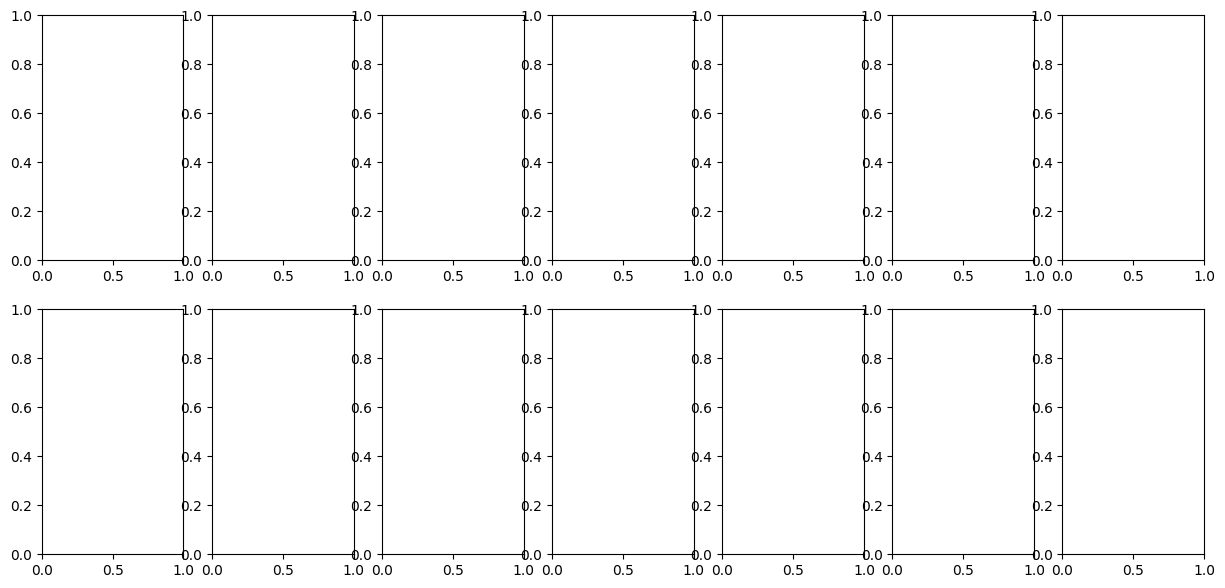

In [30]:
fire_path = "/home/sl636/TS_data/2018/fire_21458798"
fig, ax = plt.subplots(2,7, figsize=(15, 7))

for i, image in enumerate(sorted(os.listdir(fire_path))):
    img_path = os.path.join(fire_path, image)
    with rasterio.open(img_path, 'r') as f:
        img = f.read()
    current_ax = ax.flat[i]
    current_ax.axis('off')
    current_ax.imshow(np.nan_to_num(img[22,...],0.0))
    current_ax.set_title(image.split(".")[0])
plt.tight_layout()
        


In [4]:
def plot_fire(fire_path):
    fire_images = sorted(os.listdir(fire_path))
    num_fires = len(fire_images)
    
    num_cols = min(num_fires, 7)  # Limit columns to a maximum of 7 for better visualization
    num_rows = (num_fires + num_cols - 1) // num_cols  # Calculate the number of rows needed
    fig_width = 2 * num_cols
    fig_height = 2 * num_rows
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

    
    # Flatten the axes array for easy iteration
    if num_rows == 1:
        ax = [ax]
    else:
        ax = ax.flatten()

    for i, image in enumerate(sorted(os.listdir(fire_path))):
        img_path = os.path.join(fire_path, image)
        with rasterio.open(img_path, 'r') as f:
            img = f.read()
        current_ax = ax.flat[i]
        current_ax.axis('off')
        current_ax.imshow(np.nan_to_num(img[22,...],0.0))
        current_ax.set_title(image.split(".")[0], fontsize=10)
    
    
    for j in range(num_fires, len(ax)):
        ax[j].axis('off')
    plt.tight_layout()

    
        


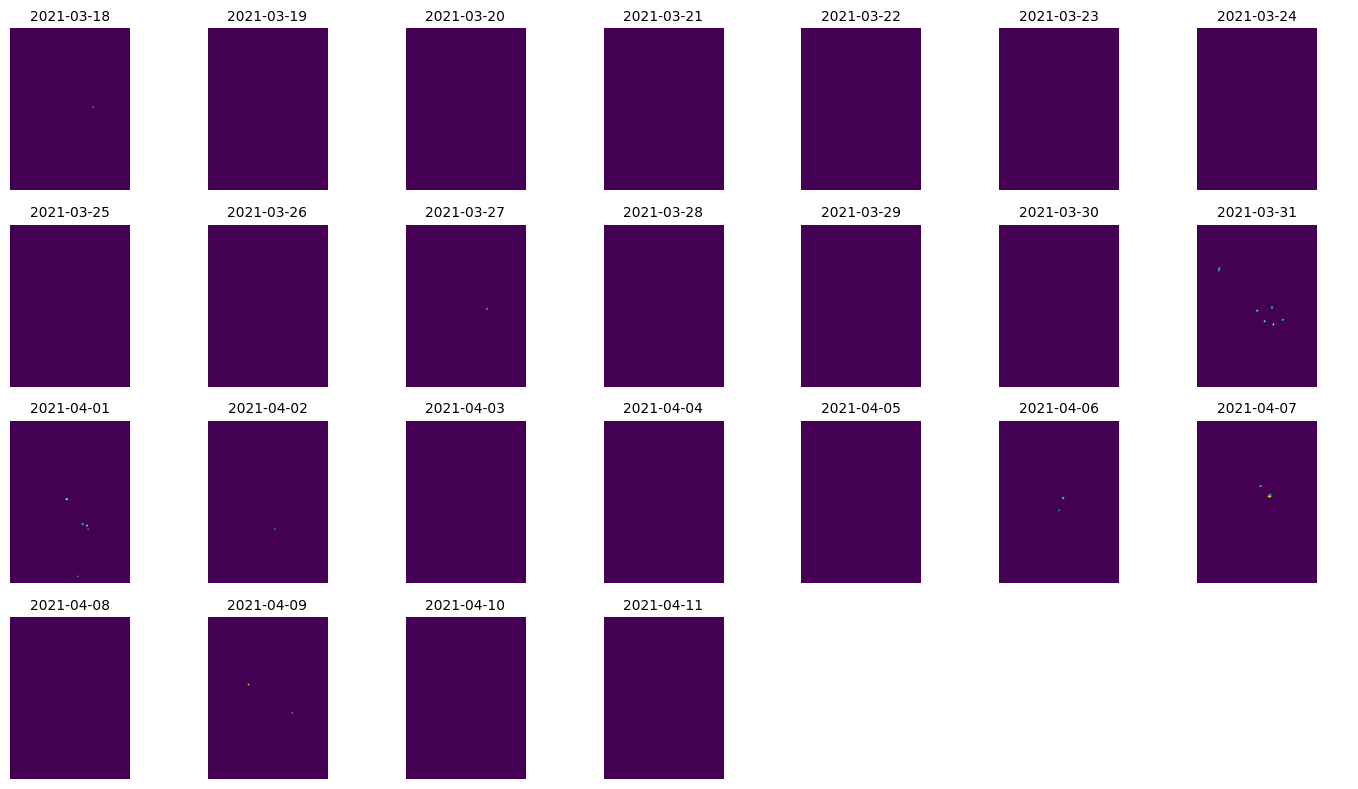

In [5]:
#fire_path = "/home/sl636/TS_data/2021/fire_24935874"
fire_path = "/home/sl636/TS_data/2021/fire_25017323"
plot_fire(fire_path)